In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
from matplotlib.animation import PillowWriter
import seaborn as sns
%matplotlib inline

idx = pd.IndexSlice

In [3]:
skins = pd.read_excel("datasets/all_skins.xlsx", header = [0,1], index_col = 0)

In [327]:
skins

Weapon              Collection            Quality  \
      Unnamed: 1_level_1      Unnamed: 2_level_1 Unnamed: 3_level_1   
0              CZ75-Auto  The Baggage Collection     Consumer Grade   
1              CZ75-Auto  The Baggage Collection     Consumer Grade   
2              CZ75-Auto  The Baggage Collection     Consumer Grade   
3              CZ75-Auto  The Baggage Collection     Consumer Grade   
4              CZ75-Auto  The Baggage Collection     Consumer Grade   
...                  ...                     ...                ...   
10276       Hydra Gloves             Clutch Case      Extraordinary   
10277       Hydra Gloves             Clutch Case      Extraordinary   
10278       Hydra Gloves             Clutch Case      Extraordinary   
10279       Hydra Gloves             Clutch Case      Extraordinary   
10280       Hydra Gloves             Clutch Case      Extraordinary   

                    Skin          Condition           StatTrak  \
      Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1   
0            Green Plaid     Battle-Scarred              False   
1            Green Plaid          Well-Worn              False   
2            Green Plaid       Field-Tested              False   
3            Green Plaid       Minimal Wear              False   
4            Green Plaid        Factory New              False   
...                  ...                ...                ...   
10276           Mangrove     Battle-Scarred              False   
10277           Mangrove          Well-Worn              False   
10278           Mangrove       Field-Tested              False   
10279           Mangrove       Minimal Wear              False   
10280           Mangrove        Factory New              False   

                Souvenir 2013-08-01        2013-08-02  ...  2020-09-09         \
      Unnamed: 7_level_1      Price Volume      Price  ...       Price Volume   
0                    0.0        NaN    NaN        NaN  ...    0.627000    2.0   
1                    0.0        NaN    NaN        NaN  ...         NaN    NaN   
2                    0.0        NaN    NaN        NaN  ...    0.478187    6.0   
3                    0.0        NaN    NaN        NaN  ...    0.780000    2.0   
4                    0.0        NaN    NaN        NaN  ...         NaN    NaN   
...                  ...        ...    ...        ...  ...         ...    ...   
10276                0.0        NaN    NaN        NaN  ...  103.652375    4.0   
10277                0.0        NaN    NaN        NaN  ...   95.089250    3.0   
10278                0.0        NaN    NaN        NaN  ...  103.107250    6.0   
10279                0.0        NaN    NaN        NaN  ...  134.215875    4.0   
10280                0.0        NaN    NaN        NaN  ...         NaN    NaN   

       2020-09-10         2020-09-11         2020-09-12         2020-09-13  \
            Price Volume       Price Volume       Price Volume       Price   
0             NaN    NaN    0.855000    4.0    1.089000    1.0    1.012000   
1        0.555000    2.0         NaN    NaN    0.490000    1.0         NaN   
2        0.456000    1.0    0.628047   10.0    0.400000    1.0    0.522000   
3        0.821000    1.0    0.777000    2.0    0.812625    5.0    0.745000   
4        1.080000    3.0    1.102500    2.0    1.147750    3.0    1.092000   
...           ...    ...         ...    ...         ...    ...         ...   
10276   96.189000    3.0  103.997000    2.0   95.311000    3.0  101.277000   
10277  105.708000    1.0  106.870000    1.0         NaN    NaN  104.022250   
10278  100.482938    5.0   99.109773    9.0  104.087446   16.0  100.290398   
10279  124.767000    3.0  131.277000    1.0  141.769000    3.0  120.625000   
10280         NaN    NaN         NaN    NaN         NaN    NaN         NaN   

              
      Volume  
0        2.0  
1        NaN  
2        5.0  
3        2.0  
4        2.0  
...      ...  
10276    3.0  
10277    3.0  
10278   11.0  
1

In [3]:
stickers = pd.read_excel("datasets/all_stickers.xlsx", header = [0,1], index_col = 0)

In [4]:
others = pd.read_excel("datasets/all_others.xlsx", header = [0,1], index_col = 0)

In [209]:
skins = skins.drop(labels = "2020-09-14", axis = 1) # 9/14/2020 data was not complete so dropped to preserve accuracy

C:\Users\William Huang\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [210]:
# created a copy of skins as loading the file can take too long
# accidental changes to the dataframe can be reverted through this clean copy

skins_copy = skins.copy()

In [16]:
# generating a basic dataframe to store calculated values
skins_data = skins.loc[:,["Weapon", "Collection", "Quality", "Skin", "Condition", "StatTrak", "Souvenir"]]

skins_data.columns = skins_data.columns.droplevel(1) #dropping the second level created for the multiindex

In [592]:
# dataframe of just skins for easier data analysis
skins_price = skins.loc[:, idx[:, "Price"]]
skins_price.columns = skins_price.columns.droplevel(1)
skins_price.columns = pd.to_datetime(skins_price.columns)
skins_price

,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.627000,NaN,0.855000,1.089000,1.012000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.555000,NaN,0.490000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327625,0.453875,0.523000,0.497563,0.460000,0.478187,0.456000,0.628047,0.400000,0.522000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734000,0.827000,0.834000,0.807000,0.874000,0.780000,0.821000,0.777000,0.812625,0.745000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115750,1.315000,1.156750,1.167000,NaN,NaN,1.080000,1.102500,1.147750,1.092000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.035250,94.789750,104.314000,103.724000,98.191500,103.652375,96.189000,103.997000,95.311000,101.277000
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.099500,93.859500,100.792000,97.992750,98.424500,95.089250,105.708000,106.870000,NaN,104.022250
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.864594,103.006438,96.488969,100.806250,101.696438,103.107250,100.482938,99.109773,104.087446,100.290398
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136.953500,139.497000,119.080000,139.493500,133.385500,134.215875,124.767000,131.277000,141.769000,120.625000


In [598]:
# dataframe of skin prices with no knives included
skins_price = skins.loc[:, idx[:, "Price"]]
skins_price.insert(loc = 0, value = skins["Quality"], column = "Quality")
skins_price = skins_price[(skins_price["Quality"] != "Extraordinary") & (skins_price["Quality"] != "Covert")]
skins_price = skins_price.drop(columns = ["Quality"], axis = 1)
skins_price.columns = skins_price.columns.droplevel(1)
skins_price.columns = pd.to_datetime(skins_price.columns)
skins_price

C:\Users\William Huang\miniconda3\envs\datascience\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.627000,NaN,0.855000,1.089000,1.012
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.555,NaN,0.490000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.327625,0.453875,0.52300,0.497563,0.460,0.478187,0.456,0.628047,0.400000,0.522
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734000,0.827000,0.83400,0.807000,0.874,0.780000,0.821,0.777000,0.812625,0.745
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.115750,1.315000,1.15675,1.167000,NaN,NaN,1.080,1.102500,1.147750,1.092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,409.030000,434.467,NaN,NaN,NaN
7271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,511.720000,NaN,488.08000,451.680000,NaN,NaN,NaN,NaN,NaN,NaN
7273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,613.505000,NaN,NaN,NaN,NaN,501.000000,NaN


In [267]:
# dataframe of just volumes for easier data analysis
vol_price = skins.loc[:, idx[:, "Volume"]]
vol_price.columns = vol_price.columns.droplevel(1)
vol_price.columns = pd.to_datetime(vol_price.columns)
vol_price

,2013-08-01,2013-08-02,2013-08-03,2013-08-04,2013-08-05,2013-08-06,2013-08-07,2013-08-08,2013-08-09,2013-08-10,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,2.0,7.0,1.0,6.0,1.0,10.0,1.0,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,5.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,3.0,2.0,NaN,NaN,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,2.0,1.0,2.0,4.0,3.0,2.0,3.0,3.0
10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,2.0,4.0,2.0,3.0,1.0,1.0,NaN,3.0
10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,7.0,3.0,10.0,6.0,5.0,9.0,16.0,11.0
10279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,1.0,2.0,2.0,4.0,3.0,1.0,3.0,1.0


# Basic Calculations

In [211]:
skins_data["AVG Price"] = skins_price.mean(axis = 1)

In [212]:
skins_data["Total Vol"] = skins_vol.apply(lambda row: np.nansum(row), axis = 1)

In [263]:
skins_data["First Date Sold"] = skins_price.apply(lambda row: pd.Series.first_valid_index(row), axis = 1)

In [233]:
vol_daily = skins_vol.apply(lambda column: np.nansum(column))
vol_daily.index = vol_daily.index.droplevel(1)
vol_daily = vol_daily.reset_index()
vol_daily["index"] = pd.to_datetime(vol_daily["index"])
vol_daily.columns = ["Date", "Vol"]

vol_daily = vol_daily[(vol_daily["Vol"] != 0)] # removing empty days at the start

vol_daily

,Date,Vol
12,2013-08-13,4.0
13,2013-08-14,87.0
14,2013-08-15,6998.0
15,2013-08-16,17072.0
16,2013-08-17,21164.0
...,...,...
2596,2020-09-09,584624.0
2597,2020-09-10,576704.0
2598,2020-09-11,619819.0
2599,2020-09-12,678882.0


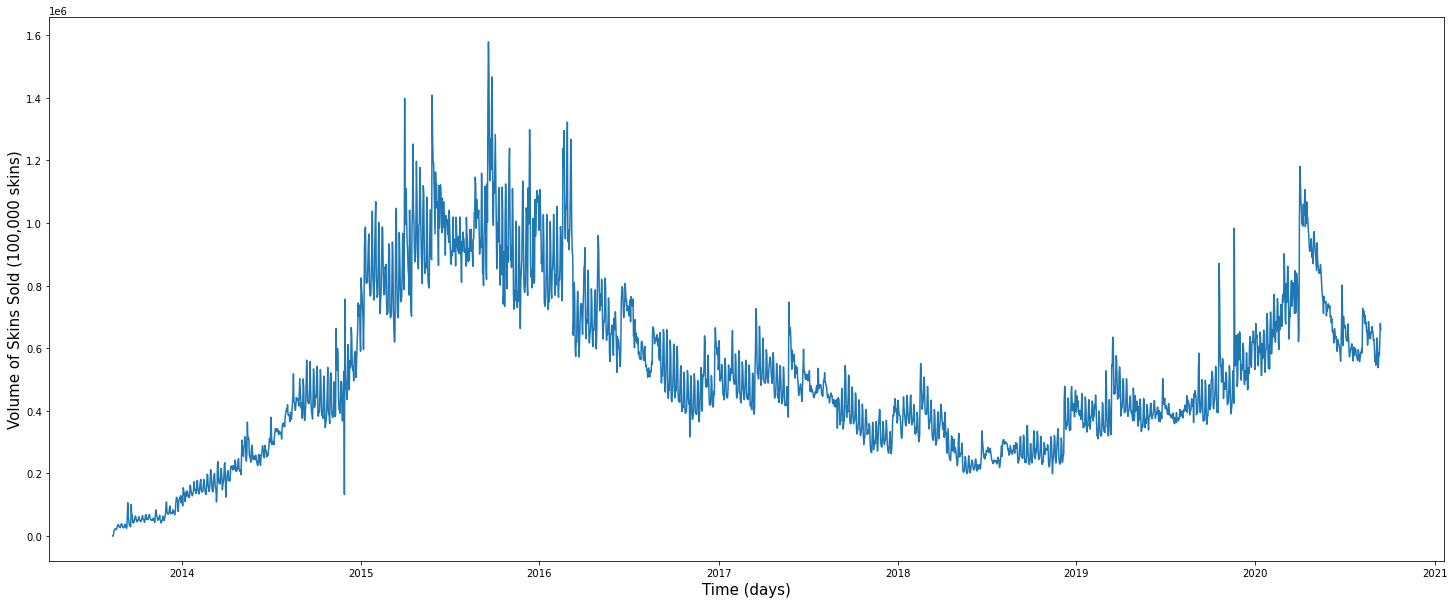

In [235]:
plt.figure(figsize = (25,10))
plt.plot(vol_daily["Date"], vol_daily["Vol"])
plt.xlabel("Time (days)", size = 15)
plt.ylabel("Volume of Skins Sold (100,000 skins)", size = 15)
plt.savefig("graphs/dailyvol_time.png")

# Appreciation Calculations

In [599]:
appreciation_dates = skins_price.apply(lambda x: pd.Series(x.loc[x.first_valid_index():].values), axis = 1)
appreciation_dates = appreciation_dates
appreciation_dates

,0,1,2,3,4,5,6,7,8,9,...,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588
0,0.040,0.046,0.036,0.044,0.049,0.044,0.042,0.045,0.034,0.037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.052,0.064,0.052,0.064,0.044,0.053,0.050,0.040,0.038,0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.044,0.033,0.032,0.036,0.037,0.038,0.031,0.032,0.030,0.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.116,0.064,0.065,0.050,0.056,0.057,0.047,0.048,0.045,0.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.248,0.155,0.138,0.107,0.113,0.137,0.106,0.095,0.090,0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,24.839,28.544,40.233,46.843,51.729,73.660,82.106,62.315,62.822,72.478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7271,24.102,30.305,40.534,74.002,62.887,74.914,62.720,NaN,47.828,66.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7272,31.214,39.519,55.980,79.862,74.302,76.386,81.875,82.814,86.024,106.325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7273,50.056,59.517,71.276,108.324,98.423,90.976,109.873,99.558,117.331,151.698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [600]:
last_dates = skins_price.fillna(method = "ffill", axis = 1)["2020-09-13"] # forward fill to take the last date sold's price
last_dates

0         1.012
1         0.490
2         0.522
3         0.745
4         1.092
         ...   
7270    434.467
7271    459.999
7272    451.680
7273    501.000
7274    541.788
Name: 2020-09-13 00:00:00, Length: 6684, dtype: float64

In [601]:
# amount earned if buying then and selling now
-(appreciation_dates.sub(last_dates, axis = 0) / appreciation_dates).mean()

0       0.770530
1       0.772174
2       0.846268
3       0.971873
4       0.916820
          ...   
2584    0.029227
2585    0.017986
2586    0.000720
2587    0.002046
2588   -0.000000
Length: 2589, dtype: float64

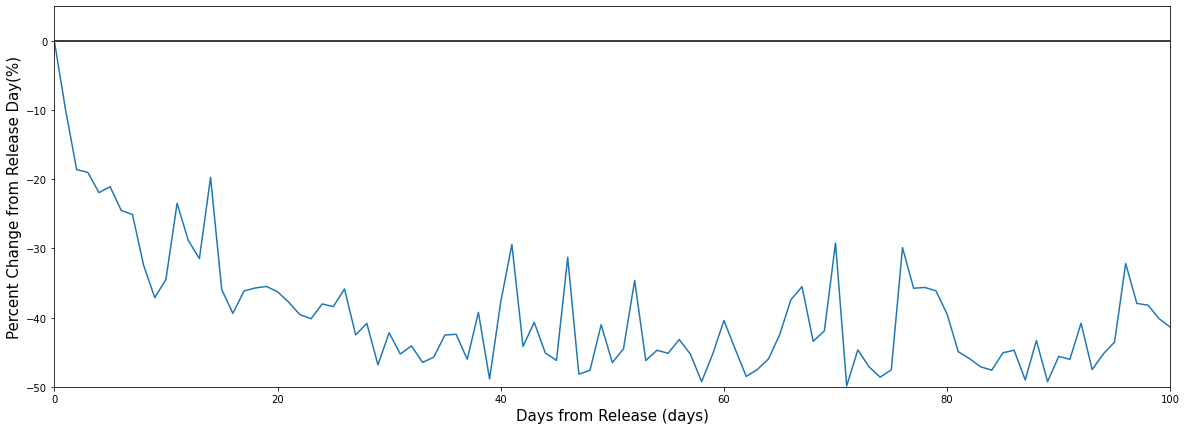

In [671]:
# percent change from day 1
pd.options.display.max_rows = 10
decrease = (((appreciation_dates.sub(appreciation_dates[0], axis = 0).div(appreciation_dates[0], axis = 0)) * 100).mean())
plt.figure(figsize = (20,7))
plt.margins(0)
plt.axhline(0, color = "black")
plt.xlabel("Days from Release (days)", size = 15)
plt.ylabel("Percent Change from Release Day(%)", size = 15)
plt.xlim(left = 0, right = 100)
plt.ylim(bottom = -50, top = 5)
plt.plot(decrease)
# plt.savefig("graphs/percentchangeskins100days.png")

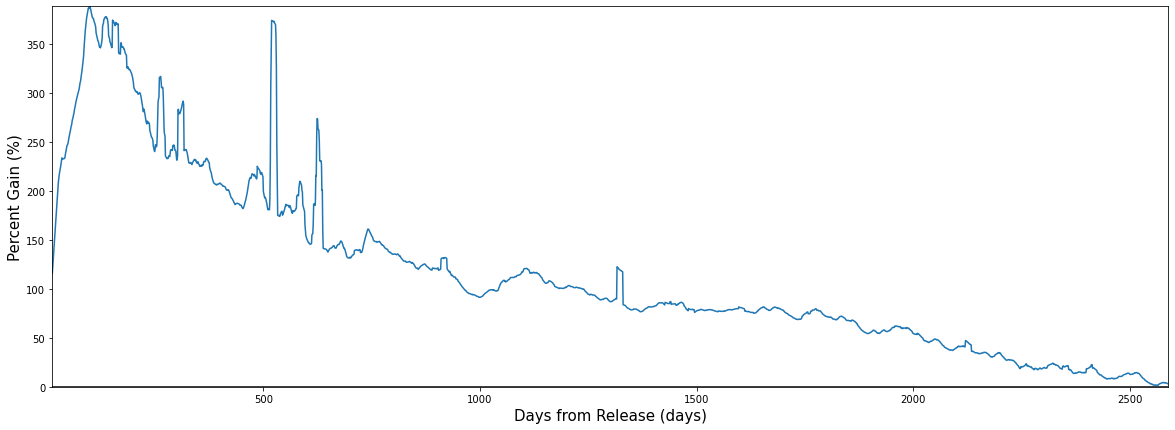

In [653]:
# calculating potential profits if bought and held to this day
profits = (-appreciation_dates.sub(last_dates, axis = 0).div(appreciation_dates) * 100).mean().rolling(14).mean()

plt.figure(figsize = (20,7))
plt.margins(0)
plt.axhline(0, color = "black")
plt.xlabel("Days from Release (days)", size = 15)
plt.ylabel("Percent Gain (%)", size = 15)
plt.plot(profits)
# plt.savefig("graphs/percentgain.png")

(array([574., 341., 164., 282., 144., 292., 308., 232., 165., 101., 181.,
        252., 127., 105., 164., 116., 126., 166., 127., 176., 101., 123.,
        140., 140.,  26., 108.,  82.,  90.,  48., 137., 101.,  51.,  62.,
         15.,  60.,  24.,  42., 139.,  31.,  19.,  20.,  32.,  22.,  48.,
         59.,  31.,  18.,  26.,  29.,  13.,  21.,  43.,  16.,  36.,   9.,
         18.,  21.,  24.,  38.,  49.,  17.,  24.,  23.,  24.,  23.,  13.,
         17.,  44.,  13.,  10.,   9.,  20.,  11.,  29.,  17.,  26.,   5.,
         18.,  13.,   5.,   7.,   4.,   5.,   3.,   4.,   4.,   5.,   3.,
         14.,   2.,   5.,   2.,   1.,   1.,   2.,   0.,   0.,   3.,   0.,
          3.]),
 array([   0.  ,   24.72,   49.44,   74.16,   98.88,  123.6 ,  148.32,
         173.04,  197.76,  222.48,  247.2 ,  271.92,  296.64,  321.36,
         346.08,  370.8 ,  395.52,  420.24,  444.96,  469.68,  494.4 ,
         519.12,  543.84,  568.56,  593.28,  618.  ,  642.72,  667.44,
         692.16,  716.88,  741.6 ,

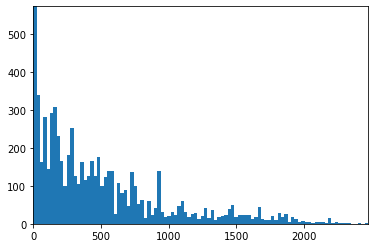

In [660]:
# calculating best possible day to buy in and hold
profits2 = (-appreciation_dates.sub(last_dates, axis = 0).div(appreciation_dates) * 100).idxmax(axis = 1)
plt.margins(0)
plt.hist(profits2, bins = 100)

In [675]:
((-appreciation_dates.sub(last_dates, axis = 0)).div(appreciation_dates))* 100

,0,1,2,3,4,5,6,7,8,9,...,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588
0,2430.000000,2100.000000,2711.111111,2200.000000,1965.306122,2200.000000,2309.523810,2148.888889,2876.470588,2635.135135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,842.307692,665.625000,842.307692,665.625000,1013.636364,824.528302,880.000000,1125.000000,1189.473684,1039.534884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1086.363636,1481.818182,1531.250000,1350.000000,1310.810811,1273.684211,1583.870968,1531.250000,1640.000000,1435.294118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,542.241379,1064.062500,1046.153846,1390.000000,1230.357143,1207.017544,1485.106383,1452.083333,1555.555556,1632.558140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,340.322581,604.516129,691.304348,920.560748,866.371681,697.080292,930.188679,1049.473684,1113.333333,1140.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,1649.132413,1422.095712,979.877215,827.496104,739.890584,489.827586,429.153777,597.210944,591.584158,499.446729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7271,1808.551158,1417.898037,1034.847289,521.603470,631.469143,514.036095,633.416773,NaN,861.777620,596.873154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7272,1347.042994,1042.943900,706.859593,465.575618,507.897499,491.312544,451.670229,445.415026,425.062773,324.810722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7273,900.879016,741.776299,602.901397,362.501385,409.027361,450.694689,355.980996,403.224251,326.997128,230.261440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [662]:
profits2.median()

352.0

In [632]:
pd.options.display.max_rows = 10
profits

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2584    3.623190
2585    3.408934
2586    3.064907
2587    2.584930
2588    2.574514
Length: 2589, dtype: float64

In [325]:
appreciation_dates[0].mean()

93.70981916342413

In [316]:
appreciation_dates[0]

0          0.040
1          0.052
2          0.044
3          0.116
4          0.248
          ...   
10276    158.815
10277    211.999
10278    236.940
10279    288.620
10280    610.750
Name: 0, Length: 10281, dtype: float64

# VOLATILITY MEASUREMENTS

In [646]:
skins_data["20dSTD AVG"] = skins_price.rolling(window = 20, axis = 1).std().mean(axis = 1)
test = ((skins_price.rolling(window = 20, axis = 1).std()).div(skins_price.rolling(window = 20, axis = 1).mean()) * 100).mean(axis = 1)
test

0       111.506095
1       100.319551
2        20.026297
3        30.226849
4        23.363263
           ...    
7270     17.133743
7271           NaN
7272     10.838429
7273     10.069064
7274     11.732715
Length: 6684, dtype: float64

In [668]:
# what are these highly volatile items
len(test.where(test > 10).dropna())

3189

In [172]:
# potential profits
pd.options.display.max_rows = 10
skins_data[((-.15 * skins_data["AVG Price"] + 1.85 * skins_data["20dSTD AVG"]) > 0) & (skins_data["Quality"] != "Extraordinary") & (skins_data["Quality"] != "Covert")]




,Weapon,Collection,Quality,Skin,Condition,StatTrak,Souvenir,20dSTD AVG,AVG Price,Total Vol
0,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Battle-Scarred,False,0.0,0.457348,2.349978,26018.0
1,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Well-Worn,False,0.0,0.679655,1.722261,16524.0
2,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Field-Tested,False,0.0,0.059312,0.283081,174308.0
3,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Minimal Wear,False,0.0,0.103822,0.343621,119618.0
4,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Factory New,False,0.0,0.279495,0.710472,107019.0
...,...,...,...,...,...,...,...,...,...,...
7261,Negev,Clutch Case,Restricted,Lionfish,Well-Worn,False,0.0,0.201538,0.577728,21643.0
7265,Negev,Clutch Case,Restricted,Lionfish,Battle-Scarred,True,0.0,0.172713,1.286481,4767.0
7270,Negev,The Norse Collection,Classified,Mjölnir,Battle-Scarred,False,0.0,44.352091,226.128971,482.0
7273,Negev,The Norse Collection,Classified,Mjölnir,Minimal Wear,False,0.0,32.343216,381.300213,1468.0


In [157]:
skins_data[((2 * skins_data["20dSTD AVG"] / skins_data["AVG Price"]) > .15)]

,Weapon,Collection,Quality,Skin,Condition,StatTrak,Souvenir,20dSTD AVG,AVG Price,Total Vol
0,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Battle-Scarred,False,0.0,0.457348,2.349978,26018.0
1,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Well-Worn,False,0.0,0.679655,1.722261,16524.0
2,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Field-Tested,False,0.0,0.059312,0.283081,174308.0
3,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Minimal Wear,False,0.0,0.103822,0.343621,119618.0
4,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Factory New,False,0.0,0.279495,0.710472,107019.0
...,...,...,...,...,...,...,...,...,...,...
7256,Negev,Revolver Case,Restricted,Power Loader,Well-Worn,True,0.0,0.200527,2.650673,11258.0
7260,Negev,Clutch Case,Restricted,Lionfish,Battle-Scarred,False,0.0,0.275676,0.546784,26209.0
7261,Negev,Clutch Case,Restricted,Lionfish,Well-Worn,False,0.0,0.201538,0.577728,21643.0
7265,Negev,Clutch Case,Restricted,Lionfish,Battle-Scarred,True,0.0,0.172713,1.286481,4767.0


In [123]:
len(skins_data)

10281

In [124]:
len(skins_data[skins_data["20dSTD AVG"] < 1])

5794

In [121]:
len(skins_data[skins_data["20dSTD AVG"] < 2])

6222

In [128]:
skins_data[skins_data["20dSTD AVG"] < 2]["AVG Price"].mean()

3.4960115049852347

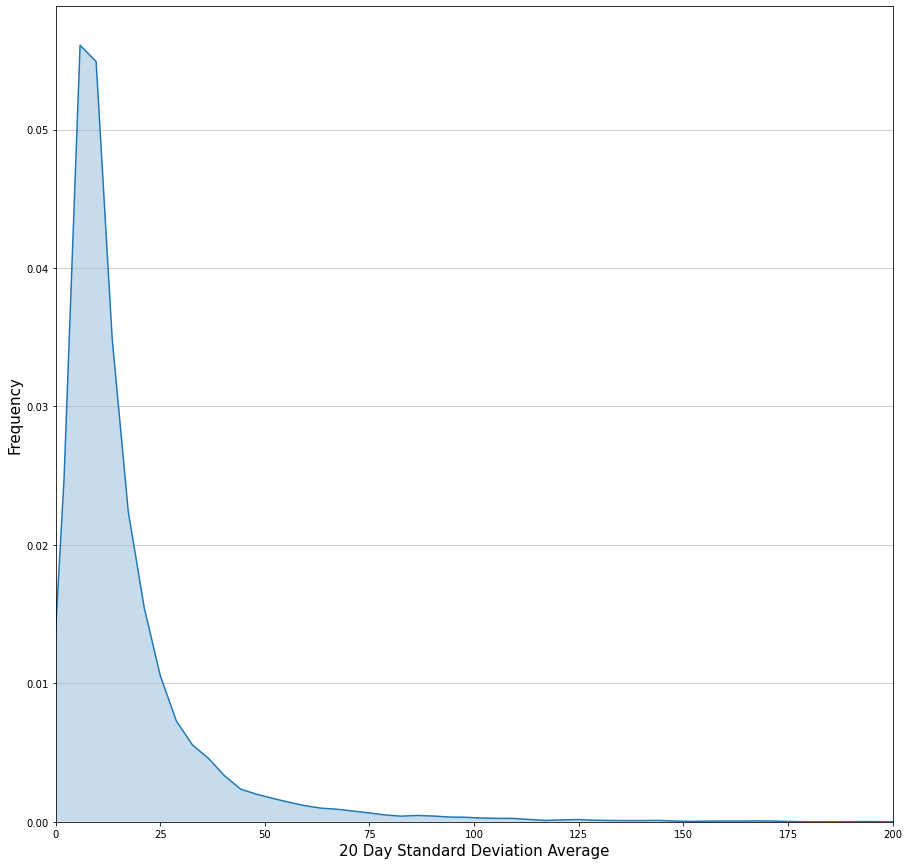

In [648]:
plt.figure(figsize = (15,15))
sns.kdeplot(test, shade = True)
plt.grid(axis = "y", alpha = .75)
plt.xlabel("20 Day Standard Deviation Average", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xlim(0, 200)
maxfreq = n.max()

## 20d STD AVG vs AVG Price
### UNUSED

<Figure size 1080x1080 with 0 Axes>

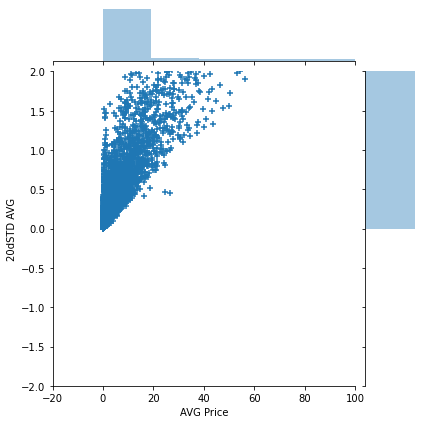

In [118]:
plt.figure(figsize = (15,15))
sns.jointplot(x = skins_data["AVG Price"], y = skins_data["20dSTD AVG"], dropna = True, xlim = (-20, 100), ylim = (-2, 2), marker = "+")

<Figure size 1080x1080 with 0 Axes>

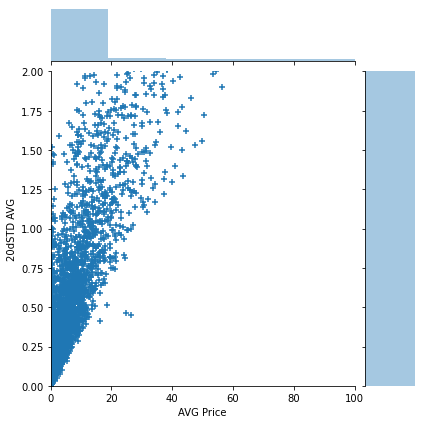

In [134]:
plt.figure(figsize = (15,15))
sns.jointplot(x = skins_data["AVG Price"], y = skins_data["20dSTD AVG"], dropna = True, xlim = (0, 100), ylim = (0, 2), marker = "+")

In [264]:
skins_data

,Weapon,Collection,Quality,Skin,Condition,StatTrak,Souvenir,20dSTD AVG,AVG Price,Total Vol,First Date Sold
0,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Battle-Scarred,False,0.0,0.457348,2.349978,26018.0,2014-07-02
1,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Well-Worn,False,0.0,0.679655,1.723136,16523.0,2014-07-02
2,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Field-Tested,False,0.0,0.059312,0.282976,174306.0,2014-07-02
3,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Minimal Wear,False,0.0,0.103822,0.343398,119617.0,2014-07-02
4,CZ75-Auto,The Baggage Collection,Consumer Grade,Green Plaid,Factory New,False,0.0,0.279495,0.710319,107018.0,2014-07-02
...,...,...,...,...,...,...,...,...,...,...,...
10276,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Battle-Scarred,False,0.0,5.974867,119.711260,1249.0,2018-02-18
10277,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Well-Worn,False,0.0,NaN,122.052609,756.0,2018-02-18
10278,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Field-Tested,False,0.0,5.890154,126.858526,4274.0,2018-02-17
10279,Hydra Gloves,Clutch Case,Extraordinary,Mangrove,Minimal Wear,False,0.0,7.645027,165.185686,961.0,2018-02-17
